In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv('datacsv/002210.csv')
stock_data = stock_data.set_index('date')
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.sort_index(axis=0, ascending=True)

In [3]:
DA = 6
stadate = '20110101'
enddate = '20170731'

In [4]:
LLV_min = stock_data['close'].rolling(window=DA).min()
HHV_max = stock_data['close'].rolling(window=DA).max()

In [5]:
HHV_LLV = pd.concat([stock_data['close'], LLV_min, HHV_max], axis=1)
HHV_LLV.columns = ['close','LLV','HHV']

In [6]:
HHV_LLV['ABS'] = np.abs(HHV_LLV['HHV']/HHV_LLV['LLV']-1)
HHV_LLV['MAX'] = HHV_LLV['ABS'].rolling(window=DA).max()

In [7]:
HHV_LLV['DA'] = DA
HHV_LLV.loc[HHV_LLV['MAX']>0.1,'DA'] = 3

In [8]:
HHV_LLV['MM'] = HHV_LLV['close'].rolling(window=DA).mean()
HHV_LLV.loc[HHV_LLV['DA'] == 3,'MM'] = HHV_LLV['close'].rolling(window=3).mean()
HHV_LLV['M1'] = HHV_LLV['MM'].shift(1)

In [9]:
HHV_LLV = HHV_LLV[pd.to_datetime(HHV_LLV.index) >= pd.to_datetime(stadate)]
HHV_LLV = HHV_LLV[pd.to_datetime(HHV_LLV.index) <= pd.to_datetime(enddate)]

In [10]:
HHV_LLV.tail()

,close,LLV,HHV,ABS,MAX,DA,MM,M1
date,,,,,,,,
2017-07-25,10.92,9.94,10.92,0.098592,0.098592,6,10.385000,10.228333
2017-07-26,10.79,9.94,10.92,0.098592,0.098592,6,10.511667,10.385000
2017-07-27,11.13,10.03,11.13,0.109671,0.109671,3,10.946667,10.511667
2017-07-28,10.95,10.50,11.13,0.060000,0.109671,3,10.956667,10.946667
2017-07-31,10.97,10.79,11.13,0.031511,0.109671,3,11.016667,10.956667


In [11]:
import Profit_Functions

In [12]:
FirstDF = HHV_LLV.loc[:,['close','MM','M1']]
buy_compare1 = HHV_LLV.loc[:,'close']
buy_compare2 = HHV_LLV.loc[:,'M1']
sell_compare1 = HHV_LLV.loc[:,'close']
sell_compare2 = HHV_LLV.loc[:,'M1']

In [13]:
SPD = Profit_Functions.Strategy_Point_MA(FirstDF,buy_compare1,buy_compare2,sell_compare1,sell_compare2)
SPD.head()

,close,MM,M1,Points,order,BS_point
date,,,,,,
2011-01-04,2.33,2.320000,2.293333,1.0,0,2.0
2011-01-05,2.33,2.326667,2.320000,1.0,1,1.0
2011-01-06,2.25,2.303333,2.326667,-1.0,2,-2.0
2011-01-07,2.28,2.286667,2.303333,-1.0,3,-1.0
2011-01-10,2.19,2.283333,2.286667,-1.0,4,-1.0


In [14]:
Buy = 'M1'
Sell = 'M1'
cash = 10000
brokerage = 2.5

In [15]:
SPf = Profit_Functions.Strategy_Profit(SPD,Buy,Sell,cash,brokerage)
SPf.head().round(3)

,Start_date,End_date,Buy_price,Sell_price,Startcash,Shares,Price,Buy_Brokerage,Surplus,AlphaCat,Sell_Brokerage,Tax,Endcash,Profit_real
0,2011-01-04,2011-01-06,2.293,2.327,10000.000,4300.0,9861.333,5.0,133.667,10004.667,5.0,10.005,10123.329,1.012
1,2011-01-27,2011-02-22,1.933,2.118,10123.329,5200.0,10053.333,5.0,64.995,11015.333,5.0,11.015,11064.313,1.106
2,2011-02-24,2011-03-10,2.112,2.202,11064.313,5200.0,10980.667,5.0,78.647,11448.667,5.0,11.449,11510.865,1.151
3,2011-03-14,2011-03-18,2.197,2.202,11510.865,5200.0,11422.667,5.0,83.198,11448.667,5.0,11.449,11515.416,1.152
4,2011-03-24,2011-03-31,2.167,2.203,11515.416,5300.0,11483.333,5.0,27.083,11677.667,5.0,11.678,11688.072,1.169


In [16]:
plt_W = 14
plt_H = 4
plt_C = 'blue'

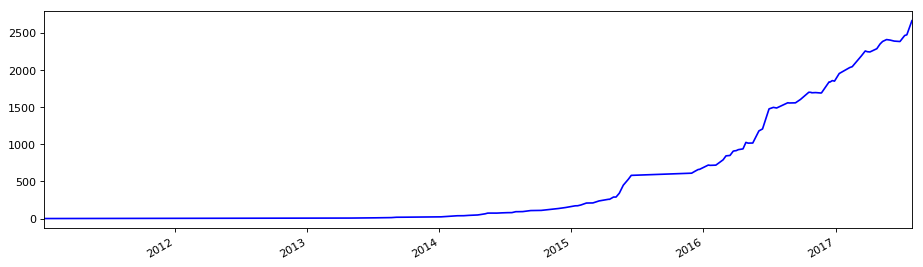

In [17]:
Profit_Functions.Strategy_Profit_plt(SPf,plt_W,plt_H,plt_C)

### 策略总收益率： 2662.435 倍
### 基准收益率： 370.815 ％
### 上证收益率： 14.736 ％